# Fig 1 supplementary 1: different dendritic and somatic nonlinearities

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np; np.set_printoptions(precision=4); np.random.seed(0)
import torch; torch.set_printoptions(precision=4)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl
import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
import scipy
import os
import warnings

from textwrap import wrap
from scipy.stats import wilcoxon

sys.path.append("../two_module_rnn/code")
os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from model_working import *
# from task import *
from functions import *
# from train import *
os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True) 
torch.backends.cudnn.deterministic = True    

1.13.1+cu116
3.10.8 (main, Nov 24 2022, 14:13:03) [GCC 11.2.0]


# a. dendritic nonlinearities

model has the following cell groups: ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip']

mGluRs set to 0.

make SR SST to SR Edend connections sparse, sparsity=0.8

# of branches per neuron: 2


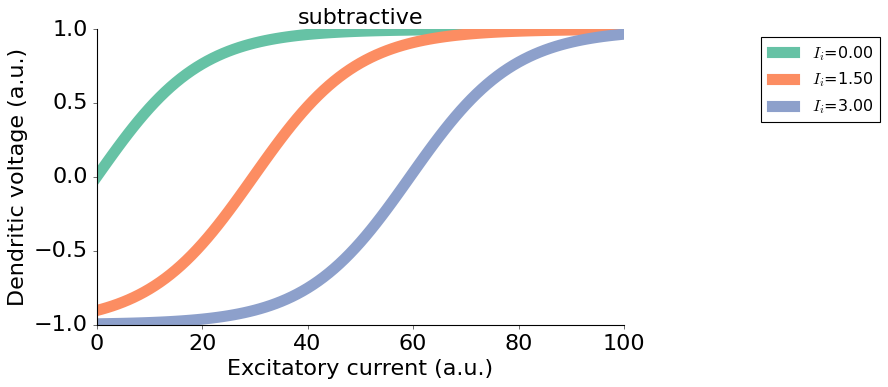

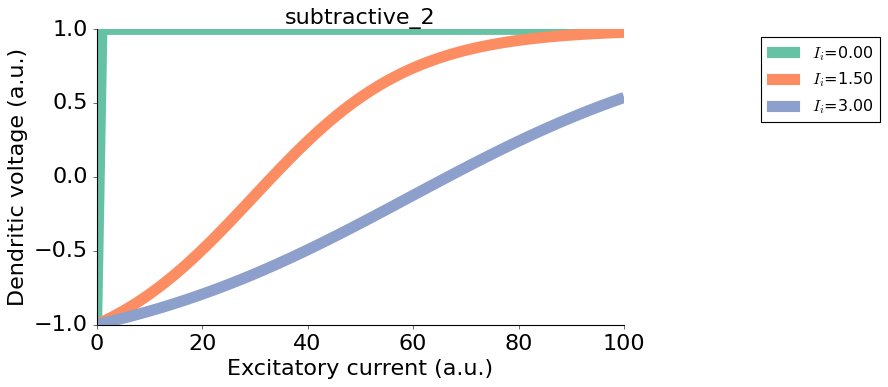

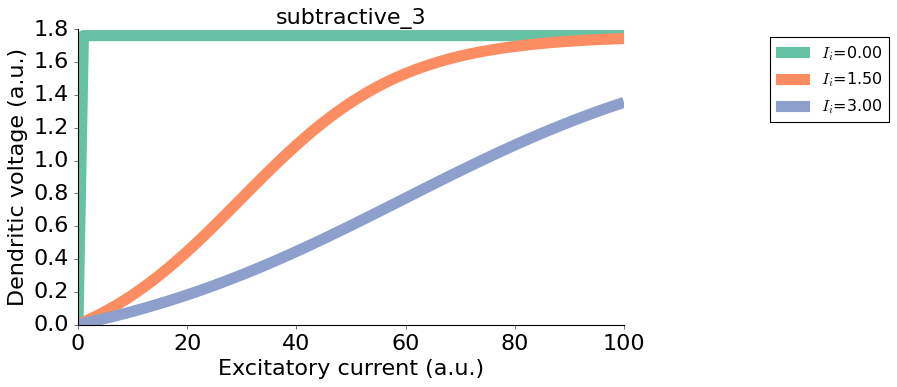

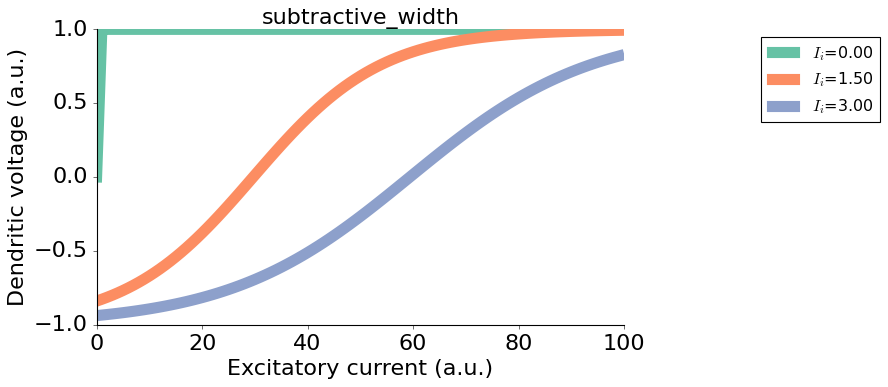

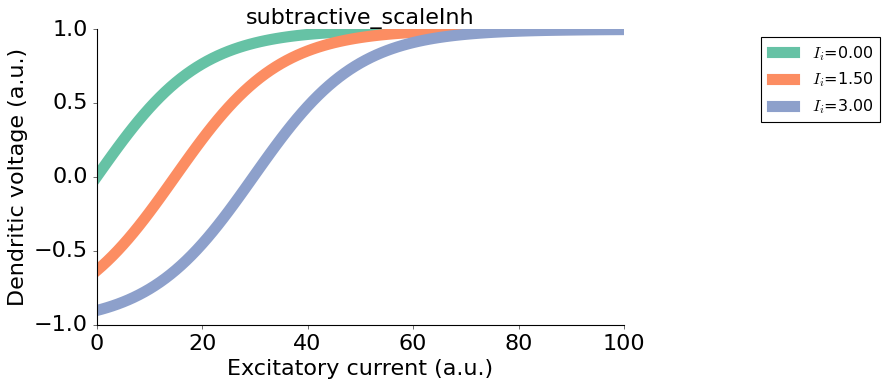

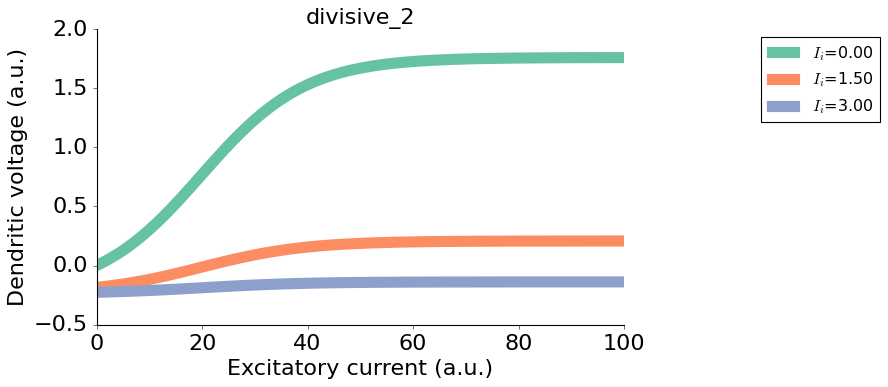

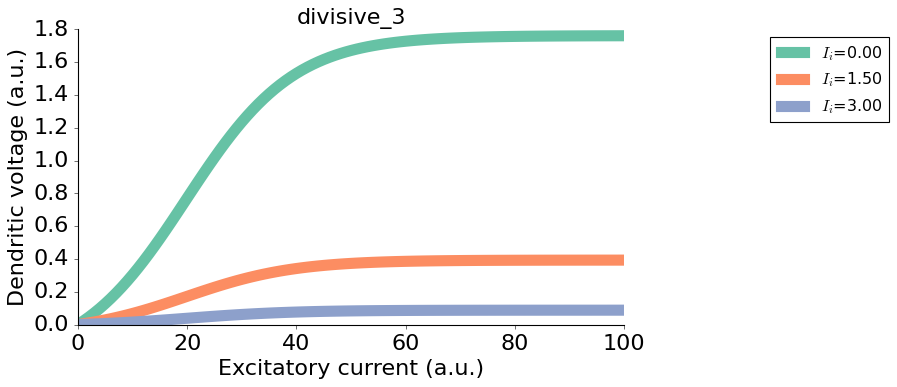

In [7]:
# Plot the dendritic nonlinearity
colors = ['#66c2a5','#fc8d62','#8da0cb']

hp, _, _ = get_default_hp()
model = Net_readoutSR_working(hp)

g_i_list = np.linspace(0, 3, num=3)
g_e_list = np.linspace(0, 5, num=100)

# dend_nonlinears = sorted(list(set(x['hp']['dend_nonlinearity'] for x in all_data)))
dend_nonlinears = ['subtractive', 'subtractive_2', 'subtractive_3', 'subtractive_width', 'subtractive_scaleInh', 'divisive_2', 'divisive_3']


for dend_nonlinear in dend_nonlinears:
    fig, ax = plt.subplots(figsize=[13, 5])
    fig.patch.set_facecolor('white')
    plt.style.use('classic')
    
    # row = 0
    # col = 0
    
    dend_activity = np.zeros([len(g_i_list), len(g_e_list)])
    for g_i_id in np.arange(len(g_i_list)):
        g_i = g_i_list[g_i_id]
        for g_e_id in np.arange(len(g_e_list)):
            g_e = g_e_list[g_e_id]
            dend_activity[g_i_id, g_e_id] = model.rnn.nonlinearity_dend(g_e=torch.Tensor([g_e]), g_i=torch.Tensor([g_i]), threshold=0.2, width=0.2, nonlinearity=dend_nonlinear)
    
    ax.set_title(dend_nonlinear, fontsize=20)
    for g_i_id in np.arange(len(g_i_list)):
        ax.plot(dend_activity[g_i_id,:], label='$I_i$={:0.2f}'.format(g_i_list[g_i_id]), color=colors[g_i_id], linewidth=10)
    ax.legend(bbox_to_anchor=(1.5, 1))
    ax.set_xlabel('Excitatory current (a.u.)', fontsize=20)
    ax.set_ylabel('Dendritic voltage (a.u.)', fontsize=20)
    
    make_pretty_axes(ax)
    fig.tight_layout()
    fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/dend_nonlinearity_{}.pdf'.format(dend_nonlinear))
    plt.show()

In [ ]:
np.arange(0, 1, 0.1)

# b. plot the somatic nonlinearities

model has the following cell groups: ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip']

mGluRs set to 0.

make SR SST to SR Edend connections sparse, sparsity=0.8

# of branches per neuron: 2


AttributeError: module 'numpy' has no attribute 'int'

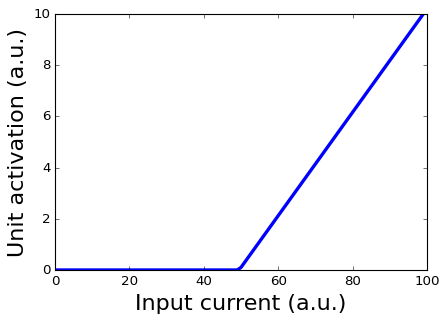

In [4]:
# Plot the somatic nonlinearity
hp, _, _ = get_default_hp()
model = Net_readoutSR_working(hp)

# g_i_list = np.linspace(1e-1, 2, num=5)
g_e_list = np.linspace(-10, 10, num=100)

# dend_nonlinears = sorted(list(set(x['hp']['dend_nonlinearity'] for x in all_data)))
soma_nonlinears = ['relu', 'relu_satu']

soma_activity = {}

fig, ax = plt.subplots(figsize=[6,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
for soma_nonlinear in soma_nonlinears:
    soma_activity[soma_nonlinear] = np.zeros(len(g_e_list))
    for g_e_id in range(len(g_e_list)):
        g_e = g_e_list[g_e_id]
#         print(g_e)
        soma_activity[soma_nonlinear][g_e_id] = model.rnn.nonlinearity_soma(input_current=torch.tensor(g_e), nonlinearity=soma_nonlinear)
#         print(g_e, model.rnn.nonlinearity_soma(input_current=torch.tensor(g_e), nonlinearity=soma_nonlinear))
    ax.plot(soma_activity[soma_nonlinear], label=soma_nonlinear, linewidth=3)
#     ax.legend(bbox_to_anchor=(0.5, 0.6))
    ax.set_xlabel('Input current (a.u.)', fontsize=20)
    ax.set_ylabel('Unit activation (a.u.)', fontsize=20)
#     plt.axhline(y=model.rnn.nonlinearity_dend(g_e=torch.Tensor([0]), g_i=torch.Tensor([0])), linestyle='--', color='k')
    xticks = np.linspace(np.round(min(g_e_list), 1), np.round(max(g_e_list), 1), num=2, dtype=np.int)
    xtickpos = np.linspace(0,len(g_e_list), num=2)
    ax.set_xticks(xtickpos)
    ax.set_xticklabels(xticks)
    ax.tick_params(axis='x', 
                   direction='out', 
                   which='both',      # both major and minor ticks are affected
                   bottom=True,      # ticks along the bottom edge are off
                   top=False,         # ticks along the top edge are off
                   labelbottom=True,
                   labelsize=20)
    ax.tick_params(axis='y', 
                   direction='out', 
                   which='both',      # both major and minor ticks are affected
                   left=True,      # ticks along the bottom edge are off
                   right=False,         # ticks along the top edge are off
                   labelleft=True,
                   labelsize=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()

In [ ]:
xtickpos